<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/from_scipy_signal_import_chirp%2C_find_peaks%2C_peak_widths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mahotas

In [0]:
# proximas etapas que falta : dividir a foto em 10x10 e aplicar o mahotas em cada foto
# encontrar 
# GLCM?
# COLOCAR MAIS VARIAVEIS NAS FOTOS
# VER QUAIS PARAMETROS USAR PARA CALCULAR O PSD (particle size distribution)
# GERAR AS IMAGENS ARTIFICIAIS

In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
%matplotlib inline

In [4]:
!wget http://ftp.feq.ufu.br/ubirajara/Amostras_Q6.zip
Transfere='Amostras_Q6.zip'

--2019-11-18 20:50:45--  http://ftp.feq.ufu.br/ubirajara/Amostras_Q6.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1785927 (1.7M) [application/zip]
Saving to: ‘Amostras_Q6.zip.3’

Amostras_Q6.zip.3   100%[===================>]   1.70M   826KB/s    in 2.1s    

2019-11-18 20:50:48 (826 KB/s) - ‘Amostras_Q6.zip.3’ saved [1785927/1785927]



In [0]:
#!ls

In [0]:
Size=800 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:

file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [8]:
print(file_name)

<zipfile.ZipFile filename='Amostras_Q6.zip' mode='r'>


--2019-11-18 20:50:50--  http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22819538 (22M) [application/zip]
Saving to: ‘quadrado_v2.zip.3’

quadrado_v2.zip.3   100%[===================>]  21.76M  5.78MB/s    in 4.0s    

2019-11-18 20:50:55 (5.45 MB/s) - ‘quadrado_v2.zip.3’ saved [22819538/22819538]



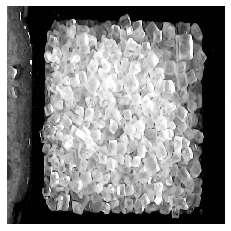

In [9]:
!wget http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip

file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
# all images are load in variable x...
FILE=Transfere
img_name=[]
xw=[]
ww=[]

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #xw.append(cv2.imread(name))
        xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

nrow=len(img_name)
ncol=Size*Size
pw=np.zeros((nrow,ncol))
#pw=[]
for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()

plt.axis("off")
plt.imshow(ww[0], cmap = "gray")

In [0]:
Nomes=['ASM','constrast','correl','variance','inv diff mom','sum aveg',
       'sum var','sum entropy','entropy','dif var','dif entropy','IMC1',
       'IMC2']


In [11]:
#foto 0 (k=0)
k=0
p_foto=pw[k,:].reshape(Size,Size)
GLCM=[]
glcm_haralick=[]
x_ref=[]
Count=Sub_Size
p=np.zeros((Sub_Size,Sub_Size))
j_ref=0
Cada_foto=[]
Posicao_X=[]
Posicao_Y=[]
for k in range(Size):
  if((k+Sub_Size-1)<Size):
    #print("(k+Sub_Size)=",(k+Sub_Size),"k=",k)
    for i in range(Sub_Size):
      Posicao_X.append(Crop+i)
      for j in range(Sub_Size):
        p[i,j]=p_foto[Crop+i,j+k]
        Posicao_Y.append(j+k)

    WW=np.copy(p) 
    Cada_foto.append(WW.ravel())
    x_ref.append(Count-Sub_Size)
    Count=Count+1
    
    Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Nomes)
    
    GLCM=[]
    for ii in Nomes:
      GLCM.append(Mahotas[ii].mean())
      #print('cheguei aqui!!!')
    glcm_haralick.append(GLCM)

df=pd.DataFrame(glcm_haralick,columns=Nomes)
print(df)
#print(Cada_foto)

          ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0    0.025113  128.947620  0.974576  ...     3.648783 -0.447844  0.998528
1    0.025108  130.519672  0.974555  ...     3.660778 -0.447377  0.998533
2    0.025103  131.834928  0.974592  ...     3.671792 -0.446802  0.998535
3    0.025098  132.576792  0.974757  ...     3.681270 -0.446459  0.998540
4    0.025094  133.582341  0.974907  ...     3.691692 -0.446164  0.998548
..        ...         ...       ...  ...          ...       ...       ...
636  0.207362  123.956986  0.990504  ...     3.178436 -0.503617  0.997024
637  0.213116  123.191698  0.990442  ...     3.154599 -0.504650  0.996912
638  0.218949  121.816808  0.990425  ...     3.129723 -0.505890  0.996803
639  0.224861  119.450121  0.990491  ...     3.104447 -0.507302  0.996695
640  0.230851  116.413810  0.990621  ...     3.077341 -0.508693  0.996580

[641 rows x 13 columns]


In [12]:
print(np.max(Posicao_X))
print(np.min(Posicao_X))

559
400


In [13]:
print(np.max(Posicao_Y))
print(np.min(Posicao_Y))

799
0


In [14]:
print(np.array(Cada_foto).shape)

(641, 25600)


In [15]:
print(np.array(GLCM).shape)
print(Mahotas)

(13,)
        ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0  0.230499  121.164623  0.990237  ...     3.112641 -0.503710  0.996573
1  0.229628  139.702899  0.988740  ...     3.232343 -0.487481  0.995974
2  0.233883   38.237343  0.996930  ...     2.672523 -0.563294  0.998099
3  0.229395  166.550374  0.986576  ...     3.291857 -0.480288  0.995676

[4 rows x 13 columns]


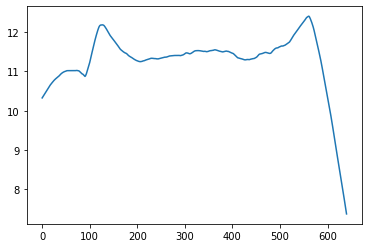

In [16]:
plt.plot(x_ref,df['entropy'])

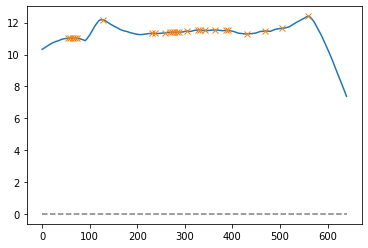

In [19]:
x=np.array(df['entropy'])
peaks, rr = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

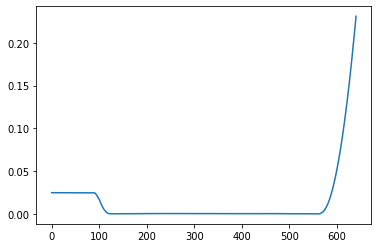

In [22]:
plt.plot(x_ref,df['ASM'])

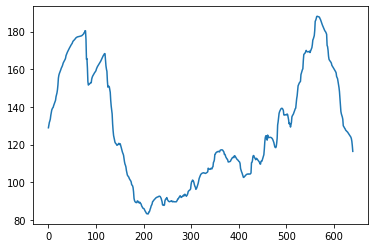

In [21]:
plt.plot(x_ref,df['constrast'])   

In [0]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

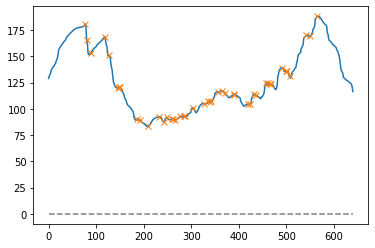

In [24]:
x=np.array(df['constrast'])
peaks, rr = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [25]:
print('Picos do contraste (posicao):')
print(peaks)

[ 77  81  89 118 127 145 148 151 187 192 209 233 242 249 259 262 266 277
 284 287 303 326 336 339 342 357 364 371 389 391 420 423 431 437 458 461
 465 467 491 499 502 507 542 549 565]


In [28]:
prominences = peak_prominences(x, peaks)[0]
print(prominences)

[5.15349209e+01 3.66206341e-01 8.14126098e-02 1.66911571e+01
 4.67497948e-01 8.47022591e-02 1.05633616e+00 3.76945137e-01
 9.07756257e-01 4.26110641e-01 1.21572957e-01 4.91198362e+00
 7.32207488e-04 2.28280984e+00 5.11486269e-01 2.25413107e-01
 3.13330045e-02 9.08974625e-01 3.66008007e-01 1.09137674e+00
 4.90289539e+00 3.70275170e-01 6.08566525e-01 3.87114458e-02
 2.81692588e-01 2.55897772e-01 1.46428345e+01 1.03594597e-01
 1.76759474e-01 3.30115700e+00 1.30285899e-01 3.75822011e-02
 4.56566468e+00 7.48905428e-01 2.35436018e+00 6.66873888e+00
 1.18208833e-02 2.16548557e-01 9.98947301e+00 1.73406597e-01
 5.95871900e-01 3.76280668e-01 1.13251664e+00 3.75119470e-01
 7.17456972e+01]


In [30]:
results_widths = peak_widths(x, peaks, rel_height=0.5)
print(results_widths)

(array([61.99653862,  0.53702477,  0.67242488, 21.34161775,  2.12744245,
        0.60773346,  2.60952378,  0.72070051,  2.51885101,  1.00753252,
        0.81488175, 17.68425512,  0.50265547,  4.48548388,  2.66666425,
        1.6246118 ,  1.18698642,  2.23580436,  1.5094225 ,  3.47227753,
        7.03501805,  4.60817408,  1.03374702,  0.68692469,  1.02085931,
        2.50070915, 56.28003068,  0.59243658,  2.11992377, 10.62054486,
        1.74632964,  1.6219047 , 10.77651537,  2.53224332,  2.7021213 ,
       17.95351133,  0.86589239,  4.45709171, 20.28061124,  2.11229982,
        2.2312689 ,  0.82854561,  2.25643192,  1.33185986, 83.06683951]), array([154.71508019, 165.48321918, 152.8638336 , 159.96910303,
       150.76600825, 119.98682913, 120.16423809, 120.20390387,
        89.67476746,  89.23410374,  83.33728921,  90.18077469,
        87.86228433,  90.7309071 ,  89.95568207,  89.76113497,
        89.65929975,  92.39092778,  92.92815396,  93.10126753,
        98.71942661, 104.88460025,

In [0]:

for i in range(1, 14):
    plt.subplot(5, 3, i)
    plt.plot(x_ref,df[Nomes[i-1]])
    plt.subplots_adjust(hspace = 1.8)
    #fig.tight_layout() 
    plt.title(Nomes[i-1])
    #plt.ylabel(Nomes[i-1])



    #plt.text(0.5, 0.5,Nomes[i-1]),fontsize=18, ha='center')

In [0]:
Num=np.argmax(df['constrast'])
Posicao=int(Num-Sub_Size/2)
plt.imshow(Cada_foto[Posicao].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[Posicao]) 

In [0]:
xv_min=[]
xv_max=[]
yv=[]
MAX_X=np.max(Posicao_X)
MIN_X=np.min(Posicao_X)
for i in range(Size):
  xv_min.append(MIN_X)
  xv_max.append(MAX_X)
  yv.append(i)
plt.imshow(ww[0], cmap = "gray")
plt.plot(xv_min,yv)
plt.plot(xv_max,yv)


In [0]:
N_search=8 # number of subsets to search
row,col=np.array(Cada_foto).shape
for i in range(N_search):
  No=int(i/N_search*row)
  Nf=int((i+1)/N_search*row)
  df_search=df.iloc[No:Nf,:]
  Num=np.argmax(df_search['constrast'])
  Posicao=int(Num-Sub_Size/2)
  plt.figure(i+1)
  plt.imshow(Cada_foto[Posicao].reshape(Sub_Size,Sub_Size), cmap = "gray")
  print(np.array(df['constrast'])[Posicao]) 
